In [1]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import warnings

C:\Users\litwi\AppData\Local\Temp\ipykernel_30568\231046988.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
data = pd.read_csv('processed.cleveland.data')
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','heart_disease']
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
data = data.replace('?', np.nan).dropna()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            296 non-null    float64
 1   sex            296 non-null    float64
 2   cp             296 non-null    float64
 3   trestbps       296 non-null    float64
 4   chol           296 non-null    float64
 5   fbs            296 non-null    float64
 6   restecg        296 non-null    float64
 7   thalach        296 non-null    float64
 8   exang          296 non-null    float64
 9   oldpeak        296 non-null    float64
 10  slope          296 non-null    float64
 11  ca             296 non-null    object 
 12  thal           296 non-null    object 
 13  heart_disease  296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


In [5]:
data['heart_disease'] = (data['heart_disease'] > 0).astype(int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


C:\Users\litwi\AppData\Local\Temp\ipykernel_30568\29093033.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


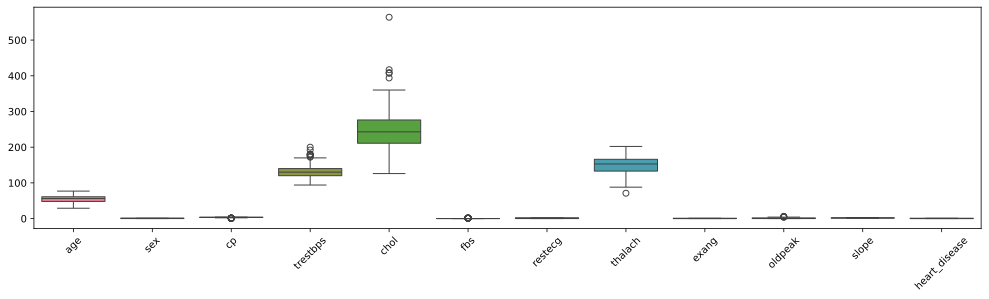

In [6]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [7]:
x = data.keys()
for i in x:
    data[i] = pd.to_numeric(data[i])
data.dtypes

age              float64
sex              float64
cp               float64
trestbps         float64
chol             float64
fbs              float64
restecg          float64
thalach          float64
exang            float64
oldpeak          float64
slope            float64
ca               float64
thal             float64
heart_disease      int64
dtype: object

<Axes: >

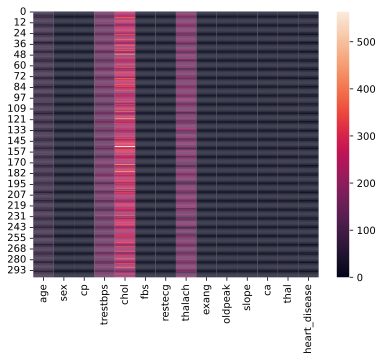

In [8]:
sns.heatmap(data)

# Turning into tensors

In [9]:
y = torch.tensor( data['heart_disease'].values).float()
data.drop(columns=['heart_disease'], inplace=True)
X = torch.tensor(data.values).float()

In [10]:
print(X[:5])
print(y[:5])

tensor([[ 67.0000,   1.0000,   4.0000, 160.0000, 286.0000,   0.0000,   2.0000,
         108.0000,   1.0000,   1.5000,   2.0000,   3.0000,   3.0000],
        [ 67.0000,   1.0000,   4.0000, 120.0000, 229.0000,   0.0000,   2.0000,
         129.0000,   1.0000,   2.6000,   2.0000,   2.0000,   7.0000],
        [ 37.0000,   1.0000,   3.0000, 130.0000, 250.0000,   0.0000,   0.0000,
         187.0000,   0.0000,   3.5000,   3.0000,   0.0000,   3.0000],
        [ 41.0000,   0.0000,   2.0000, 130.0000, 204.0000,   0.0000,   2.0000,
         172.0000,   0.0000,   1.4000,   1.0000,   0.0000,   3.0000],
        [ 56.0000,   1.0000,   2.0000, 120.0000, 236.0000,   0.0000,   0.0000,
         178.0000,   0.0000,   0.8000,   1.0000,   0.0000,   3.0000]])
tensor([1., 1., 0., 0., 0.])


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50)

In [12]:
print(X_train.shape, y_train.shape)

torch.Size([246, 13]) torch.Size([246])


# Architecture

In [13]:
class net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.hidden_layer2 = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.input_layer(X))
        X = self.relu(self.hidden_layer(X))
        X = self.relu(self.hidden_layer2(X))
        X = self.relu(self.hidden_layer(X))

        return self.output_layer(X).squeeze()

# Train

In [14]:
model = net(13, 62, 1)
lossfn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=.001)

In [15]:
epochs = 200

trainLoss = torch.zeros(epochs)
testLoss  = torch.zeros(epochs)
trainAcc  = torch.zeros(epochs)
testAcc   = torch.zeros(epochs)

for epoch in range(epochs):

    y_pred = model(X)
    loss = lossfn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    trainLoss[epoch]=(loss.item())

    predictions = (torch.sigmoid(y_pred)>.5).float()
    trainAcc[epoch] = 100*torch.mean((predictions==y).float())
    
    yHat = model(X)
      
    loss = lossfn(yHat,y)
    testLoss[epoch] = loss.item()
      
    predictions = (torch.sigmoid(yHat)>.5).float()
    testAcc[epoch] = 100*torch.mean((predictions==y).float())
    

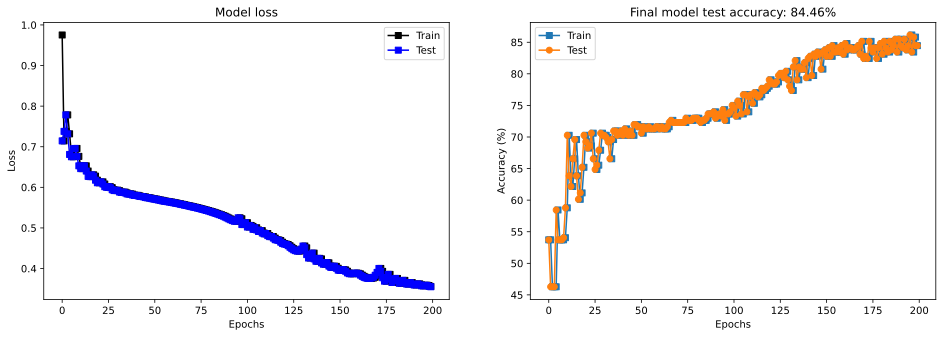

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'ks-',label='Train')
ax[0].plot(testLoss,'bs-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()